In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

In [2]:
df = pd.read_csv('income_annual.csv')

In [3]:
df.head()

,year,percapitaincomeus
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
df.describe()

,year,percapitaincomeus
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


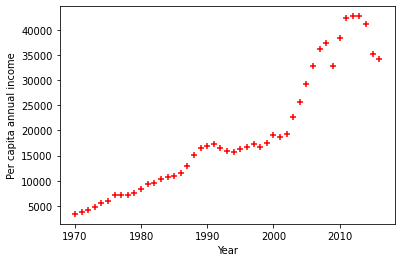

In [5]:
plt.xlabel('Year')
plt.ylabel('Per capita annual income')
plt.scatter(df.year, df.percapitaincomeus, color = 'red', marker='+')

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lm = LinearRegression()

In [8]:
y = df['percapitaincomeus']

In [9]:
x = df[['year']]

In [10]:
lm.fit(x, y)

LinearRegression()

In [11]:
lm.intercept_

-1632210.7578554575

In [12]:
lm.coef_

array([828.46507522])

In [13]:
lm.predict([[2019]])

array([40460.22901919])

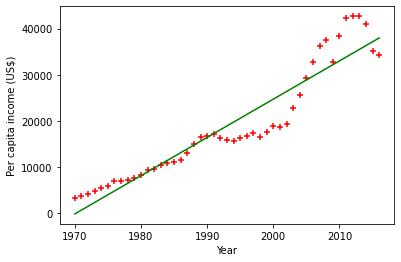

In [14]:
plt.xlabel('Year')
plt.ylabel('Per capita income (US$)')
plt.scatter(df.year, df.percapitaincomeus, color = 'red', marker = '+')
plt.plot(df.year, lm.predict(df[['year']]), color = 'green')

## Multiple linear regression

In [15]:
df1 = pd.read_csv('interview_score.csv')

In [16]:
df1.head()

,experience,test_score(out of 10),interview_score(out of 10),salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [17]:
df1.describe()

,test_score(out of 10),interview_score(out of 10),salary
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [18]:
df1.count()

experience                    6
test_score(out of 10)         7
interview_score(out of 10)    8
salary                        8
dtype: int64

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary                      8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [20]:
df1['experience'].dropna(axis = 0, inplace = True)

In [21]:
df1.describe()

,test_score(out of 10),interview_score(out of 10),salary
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [22]:
df1.head()

,experience,test_score(out of 10),interview_score(out of 10),salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [23]:
df1.dropna(axis = 0, inplace = True)

In [24]:
df1.head()

,experience,test_score(out of 10),interview_score(out of 10),salary
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
7,eleven,7.0,8,80000


In [25]:
df1.corr

<bound method DataFrame.corr of   experience  test_score(out of 10)  interview_score(out of 10)  salary
2       five                    6.0                           7   60000
3        two                   10.0                          10   65000
4      seven                    9.0                           6   70000
5      three                    7.0                          10   62000
7     eleven                    7.0                           8   80000>

In [26]:
from word2number import w2n
df1.experience = df1.experience.apply(w2n.word_to_num)

In [27]:
mlr = LinearRegression()

In [28]:
mlr.fit(df1[['experience', 'test_score(out of 10)','interview_score(out of 10)']],df1.salary)

LinearRegression()

In [29]:
mlr.intercept_

22762.365191521

In [30]:
mlr.coef_

array([2701.56191893, 2006.879881  , 1689.66158423])

In [31]:
mlr.predict([[15,10,10]])

array([100251.20862774])

## How to save a model and plan for future prediction . first see the pickle method

In [32]:
import pickle

In [33]:
with open('model_pickle','wb') as f:
    pickle.dump(mlr,f)

In [34]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [35]:
mp.predict([[10,8,9]])

array([81039.97768687])

## Now we will see another method called jonlib.

In [36]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [38]:
from joblib import dump, load

In [39]:
dump(mlr, 'model_joblib')

['model_joblib']

In [40]:
mjp = load('model_joblib')

In [41]:
mjp.predict([[2,8,7]])

array([56048.15916698])